In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


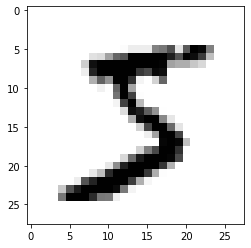

<class 'str'>
<class 'numpy.ndarray'> this


In [3]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.show()
y[0]                            #문자형이므로 숫자형으로 바꾸어야 함
print(type(y[0]))
y=y.astype(np.uint8)
y=y.astype(np.uint8)
print(type(y), "this")
X_train, X_test, y_train, y_test = X[:60000], X[10000:], y[:60000], y[10000:] #앞쪽 60000개train set 뒤쪽 10000개 test셋으로 나눔


minMaxScaler = MinMaxScaler()                       # Logistic regression에 적용시, training 속도 향상을 위해 스케일링 함.
X_scaled = minMaxScaler.fit_transform(X)            # 이는 decision tree기반 알고리즘에는 영향을 안줌으로, 그대로 RandomForest 등에 사용.
X_train_scaled = minMaxScaler.transform(X_train)
X_test_scaled = minMaxScaler.transform(X_test)

# RandomForest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf=RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
pred=rf.predict(X_test_scaled)

In [36]:
accuracy = accuracy_score(y_test , pred)

In [37]:
print(accuracy)

0.9949


In [10]:
score_c = cross_val_score(rf, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9644
교차 검증 1 정확도: 0.9632
교차 검증 2 정확도: 0.9686
교차 검증 평균 정확도: 0.9654


# Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(solver="saga", random_state=42, max_iter=5000)     # Converge 하지못하는 문제때문에 iteration을 늘렸습니다.
lr.fit(X_train_scaled, y_train)
pred=lr.predict(X_test_scaled)

In [13]:
accuracy = accuracy_score(y_test , pred)

In [14]:
print(accuracy)

0.9366833333333333


In [15]:
score_c = cross_val_score(lr, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9181
교차 검증 1 정확도: 0.9160
교차 검증 2 정확도: 0.9248
교차 검증 평균 정확도: 0.9196


# Extra Randomforest

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
erf=ExtraTreesClassifier(random_state=42).fit(X_train_scaled, y_train)
pred=erf.predict(X_test_scaled)

In [20]:
accuracy = accuracy_score(y_test , pred)

In [21]:
print(accuracy)

0.9953666666666666


In [22]:
score_c = cross_val_score(erf, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9691
교차 검증 1 정확도: 0.9673
교차 검증 2 정확도: 0.9713
교차 검증 평균 정확도: 0.9692


# XG Boosting

In [45]:
from xgboost import XGBClassifier

In [47]:
xgb=XGBClassifier(booster='gbtree',
                    max_depth=8,
                    n_estimators=50, 
                    random_state=42)

xgb.fit(X_train_scaled,y_train, eval_set=[(X_test_scaled,y_test)], early_stopping_rounds=5)

[0]	validation_0-merror:0.08860
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.05853
[2]	validation_0-merror:0.04755
[3]	validation_0-merror:0.03967
[4]	validation_0-merror:0.03428
[5]	validation_0-merror:0.03025
[6]	validation_0-merror:0.02687
[7]	validation_0-merror:0.02367
[8]	validation_0-merror:0.02078
[9]	validation_0-merror:0.01857
[10]	validation_0-merror:0.01653
[11]	validation_0-merror:0.01487
[12]	validation_0-merror:0.01343
[13]	validation_0-merror:0.01228
[14]	validation_0-merror:0.01107
[15]	validation_0-merror:0.01003
[16]	validation_0-merror:0.00935
[17]	validation_0-merror:0.00878
[18]	validation_0-merror:0.00827
[19]	validation_0-merror:0.00752
[20]	validation_0-merror:0.00715
[21]	validation_0-merror:0.00665
[22]	validation_0-merror:0.00633
[23]	validation_0-merror:0.00608
[24]	validation_0-merror:0.00580
[25]	validation_0-merror:0.00543
[26]	validation_0-merror:0.00525
[27]	validation_0-merror:0.00513
[28]	validation_0-me

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
pred = xgb.predict(X_test_scaled)

In [49]:
accuracy = accuracy_score(y_test , pred)

In [50]:
print(accuracy)

0.9961


In [71]:
score_c = cross_val_score(xgb, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9716
교차 검증 1 정확도: 0.9685
교차 검증 2 정확도: 0.9718
교차 검증 평균 정확도: 0.9706


# Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gb= GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
pred = gb.predict(X_test_scaled)

In [8]:
# errors=[mean_squared_error(y_test,pred)
#   for pred in gb.staged_predict(X_test) ]
# bst_n_estimators=np.argmin(errors)+1
# gb_best =GradientBoostingClassifier(n_estimators=bst_n_estimators)
# gb_best.fit(X_train, y_train)
# pred = gb_best.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test , pred)

In [87]:
print(accuracy)

0.9589333333333333


In [88]:
score_c = cross_val_score(gb, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9413
교차 검증 1 정확도: 0.9409
교차 검증 2 정확도: 0.9475
교차 검증 평균 정확도: 0.9433


# Voting

### 직접투표

In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
voting_hard = VotingClassifier(
    estimators=[('rf', rf), ('erf', erf), ('xgb', xgb)],
    voting='hard')

In [54]:
voting_hard.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('erf', ExtraTreesClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=8,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=50, n_jobs=0,
            

In [55]:
pred=voting_hard.predict(X_test_scaled)

In [56]:
accuracy = accuracy_score(y_test , pred)

In [57]:
print(accuracy)

0.9959166666666667


In [58]:
score_c = cross_val_score(voting_hard, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9707
교차 검증 1 정확도: 0.9688
교차 검증 2 정확도: 0.9726
교차 검증 평균 정확도: 0.9707


### 간접투표

In [65]:
voting_soft = VotingClassifier(
    estimators=[('rf', rf), ('erf', erf), ('xgb', xgb)],
    voting='soft')

In [66]:
voting_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('erf', ExtraTreesClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=8,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=50, n_jobs=0,
            

In [67]:
pred=voting_soft.predict(X_test_scaled)

In [68]:
accuracy = accuracy_score(y_test , pred)

In [69]:
print(accuracy)

0.9961166666666667


In [70]:
score_c = cross_val_score(voting_soft, X_scaled, y, cv=3)
for iter_count, accuracy in enumerate(score_c):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("교차 검증 평균 정확도: {0:.4f}".format(np.mean(score_c)))

교차 검증 0 정확도: 0.9735
교차 검증 1 정확도: 0.9701
교차 검증 2 정확도: 0.9739
교차 검증 평균 정확도: 0.9725


# Comparison

교차검증평균 정확도:
RandomForest: 0.9654
lr: 0.9196
erf: 0.9692
xgb: 0.9706
gb: 0.9433
직접투표 voting: 0.9707
간접투표 voting: 0.9725


그저 성능 평가를 위해, 속도는 고려하지 않아서 느리다...,     GB까지하면 넘 느려서 뺏다...
e다른 친구들은 standardization에 안민감! 그러므로 LR을 쓰기위해 썻음 오래걸릴거 알지만 썻다...